In [1]:
from utils import get_data_path, load_csv, load_shapefile
import pandas as pd
import geopandas as gpd

In [2]:
df_ppa = load_csv('ppa_reg.csv')

In [3]:
df_ppa.head()

,id,codigo orgao,descricao orgao,codigo unidade,descricao unidade,codigo programa,descricao programa,codigo acao,descricao acao,codigo da,...,descricao produto,descricao unidade medida,quantidade 2022,valor 2022,quantidade 2023,valor 2023,quantidade 2024,valor 2024,quantidade 2025,valor 2025
0,2_10_3011_1220,2,Hospital do Servidor Público Municipal,10,Hospital do Servidor Público Municipal,3011,"Modernização Tecnológica, Desburocratização e ...",1220,Desenvolvimento de Sistemas de Informação e Co...,777.05.09.00.001,...,Projeto concluído,unida,"1,00",1000.0,"0,00",0.0,0,0.0,0,0.0
1,2_10_3024_2100,2,Hospital do Servidor Público Municipal,10,Hospital do Servidor Público Municipal,3024,Suporte Administrativo,2100,Administração da Unidade,777.05.09.00.001,...,Operação/Serviço mantido,unida,"0,00",237584938.0,"0,00",272179517.0,0,274852853.0,0,277723036.0
2,2_10_3026_1536,2,Hospital do Servidor Público Municipal,10,Hospital do Servidor Público Municipal,3026,Ações e Serviços da Saúde em Atenção Hospitala...,1536,"Ampliação, Reforma e Requalificação de Equipam...",777.05.09.00.001,...,Projeto concluído,unida,"1,00",1000.0,"0,00",0.0,0,0.0,0,0.0
3,2_10_3026_2044,2,Hospital do Servidor Público Municipal,10,Hospital do Servidor Público Municipal,3026,Ações e Serviços da Saúde em Atenção Hospitala...,2044,Execução de Serviços Médicos de Tratamento de ...,777.05.09.00.001,...,Operação/Serviço mantido,unida,"0,00",1800000.0,"0,00",2073569.0,0,2094305.0,0,2116567.0
4,2_10_3026_2507,2,Hospital do Servidor Público Municipal,10,Hospital do Servidor Público Municipal,3026,Ações e Serviços da Saúde em Atenção Hospitala...,2507,Manutenção e Operação em Atenção Hospitalar e ...,777.05.09.00.001,...,Operação/Serviço mantido,unida,"1,00",138903857.0,"1,00",107031063.0,1,108010695.0,1,109062435.0


In [4]:
gdf=load_shapefile('subprefs/subprefs.shp')[['nm_subpref', 'sg_subpref', 'geometry']]

In [5]:
gdf.columns

Index(['nm_subpref', 'sg_subpref', 'geometry'], dtype='object')

<Axes: >

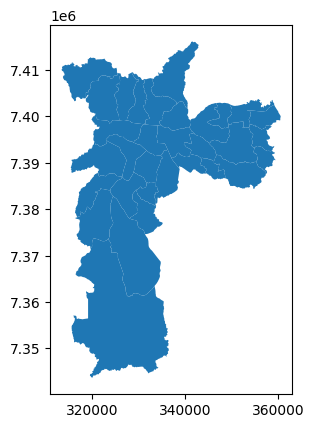

In [6]:
gdf.plot()

In [7]:
def agrupar_por_subprefeitura(df_ppa:pd.DataFrame, ano:int) -> pd.DataFrame:
    
    col_valor = f"valor {ano}"
    group_columns = [
        'descricao programa',
        "descricao prefeitura regional"
    ]
    columns = group_columns + [col_valor]
    df_ppa = df_ppa[columns].copy()

    df_ppa = df_ppa.groupby(group_columns)[col_valor].sum().reset_index()

    return df_ppa


def merge_com_subs(df_ppa:pd.DataFrame, gdf:gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    """
    Merges the PPA DataFrame with the GeoDataFrame of subprefectures.
    
    :param df_ppa: DataFrame containing PPA data.
    :param gdf: GeoDataFrame of subprefectures.
    :return: Merged GeoDataFrame.
    """

    gdf_mapa = gdf.merge(df_ppa, 
                                  how = "left", 
                                  left_on = "nm_subpref", 
                                  right_on = "descricao prefeitura regional")
    
    return gdf_mapa

In [8]:
merged = agrupar_por_subprefeitura(df_ppa, 2024)
gdf_mapa = merge_com_subs(merged, gdf)

In [9]:
gdf_mapa

,nm_subpref,sg_subpref,geometry,descricao programa,descricao prefeitura regional,valor 2024
0,CIDADE ADEMAR,AD,"POLYGON ((332383.832 7381216.079, 332408.532 7...",Acesso à Cultura,CIDADE ADEMAR,3828734.0
1,CIDADE ADEMAR,AD,"POLYGON ((332383.832 7381216.079, 332408.532 7...",Acesso à Moradia Adequada,CIDADE ADEMAR,4063548.0
2,CIDADE ADEMAR,AD,"POLYGON ((332383.832 7381216.079, 332408.532 7...",Gestão dos Riscos e Promoção da Resiliência a ...,CIDADE ADEMAR,27064046.0
3,CIDADE ADEMAR,AD,"POLYGON ((332383.832 7381216.079, 332408.532 7...","Manutenção, Desenvolvimento e Promoção da Qual...",CIDADE ADEMAR,227853935.0
4,CIDADE ADEMAR,AD,"POLYGON ((332383.832 7381216.079, 332408.532 7...",Melhoria da Mobilidade Urbana Universal,CIDADE ADEMAR,38467938.0
...,...,...,...,...,...,...
670,CAPELA DO SOCORRO,CS,"POLYGON ((324231.68 7377883.648, 324086.906 73...",Promoção dos Direitos da População Idosa,CAPELA DO SOCORRO,5309948.0
671,CAPELA DO SOCORRO,CS,"POLYGON ((324231.68 7377883.648, 324086.906 73...",Proteção e Desenvolvimento Integral na Primeir...,CAPELA DO SOCORRO,738706469.0
672,CAPELA DO SOCORRO,CS,"POLYGON ((324231.68 7377883.648, 324086.906 73...",Proteção à População em Situação de Vulnerabil...,CAPELA DO SOCORRO,48169103.0
673,CAPELA DO SOCORRO,CS,"POLYGON ((324231.68 7377883.648, 324086.906 73...",Requalificação e Promoção da Ocupação dos Espa...,CAPELA DO SOCORRO,33057988.0


In [10]:
gdf_mapa.columns

Index(['nm_subpref', 'sg_subpref', 'geometry', 'descricao programa',
       'descricao prefeitura regional', 'valor 2024'],
      dtype='object')

In [11]:
from etl import load_data

In [12]:
load_data().plot()

TypeError: DataLoader.__call__() missing 1 required positional argument: 'ano'